##### When the distribution of column is not normal, and it is skewed then we use IQR method to detect and treat the outliers.We can plot boxplot of any numerical column

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [7]:
img=pltimg.imread('iqr.png')

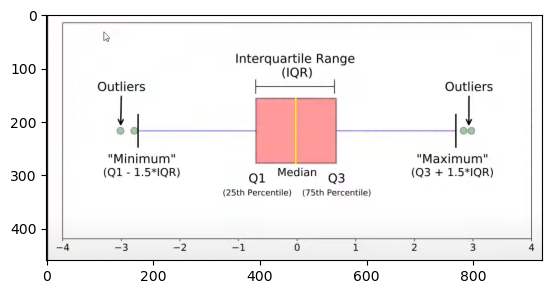

In [8]:
plt.imshow(img)

##### As we can see that ,outliers are those which are less than minimum range and greater than maximum range of column.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('placement.csv')

In [12]:
df.sample(5)

,cgpa,placement_exam_marks,placed
945,6.71,26.0,1
2,7.54,40.0,1
343,7.20,70.0,1
70,6.98,17.0,1
691,7.32,14.0,0


##### Plotting the distribution for input columns.

C:\Users\bagwe\AppData\Local\Temp\ipykernel_20632\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\bagwe\AppData\Local\Temp\ipykernel_20632\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


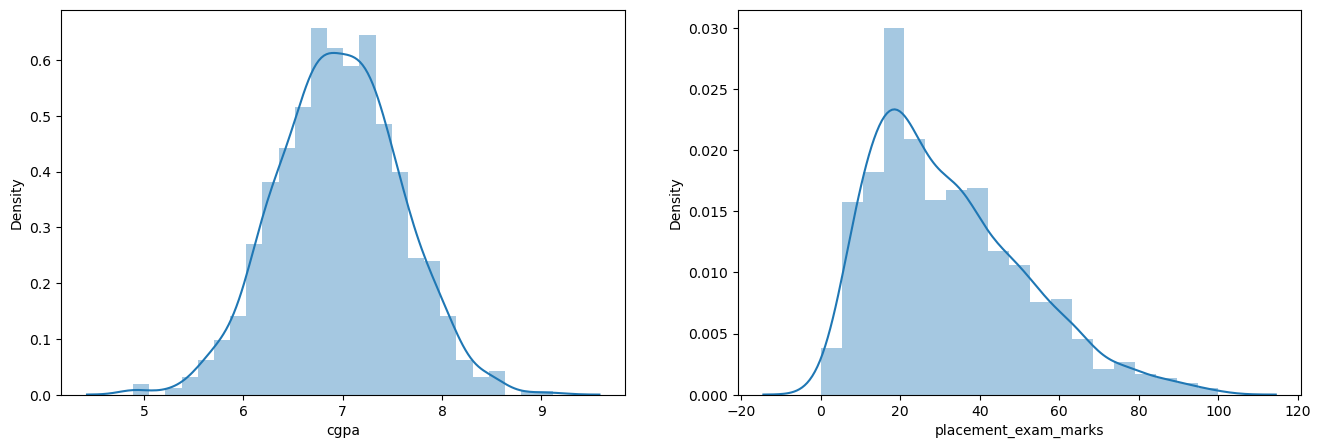

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

##### As we can see that placement_exam_marks is the column which is not normally distributed and it is skewed.So ,we can use IQR method on it.

In [16]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [17]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

##### Plottong the box plot to determine outliers.

<Axes: >

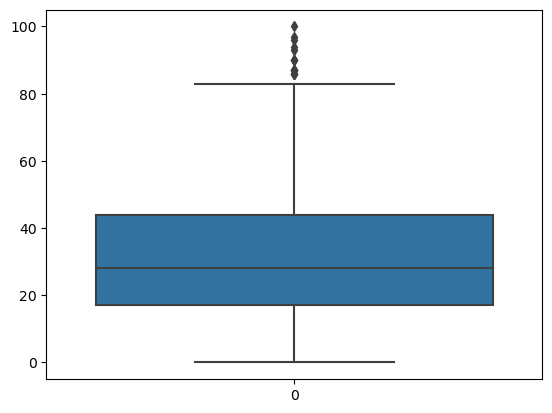

In [18]:
sns.boxplot(df['placement_exam_marks'])

##### Now . we need to store the values of 25 and 75 percentile .We can obtain that values using quantile() and passing the number in percentage.For e,g for 25 % , we shall pass 0.25

In [20]:

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [21]:
percentile25,percentile75

(17.0, 44.0)

##### Iqr formula is percentile75-percentile25.

In [22]:
## Finding iqr
iqr=percentile75-percentile25
iqr

27.0

##### Now , lets caculate the max limit and min limit of values in the column.

In [23]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [24]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding Outliers

In [25]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [26]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [27]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [28]:
new_df.shape

(985, 3)

C:\Users\bagwe\AppData\Local\Temp\ipykernel_20632\3798459719.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\bagwe\AppData\Local\Temp\ipykernel_20632\3798459719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


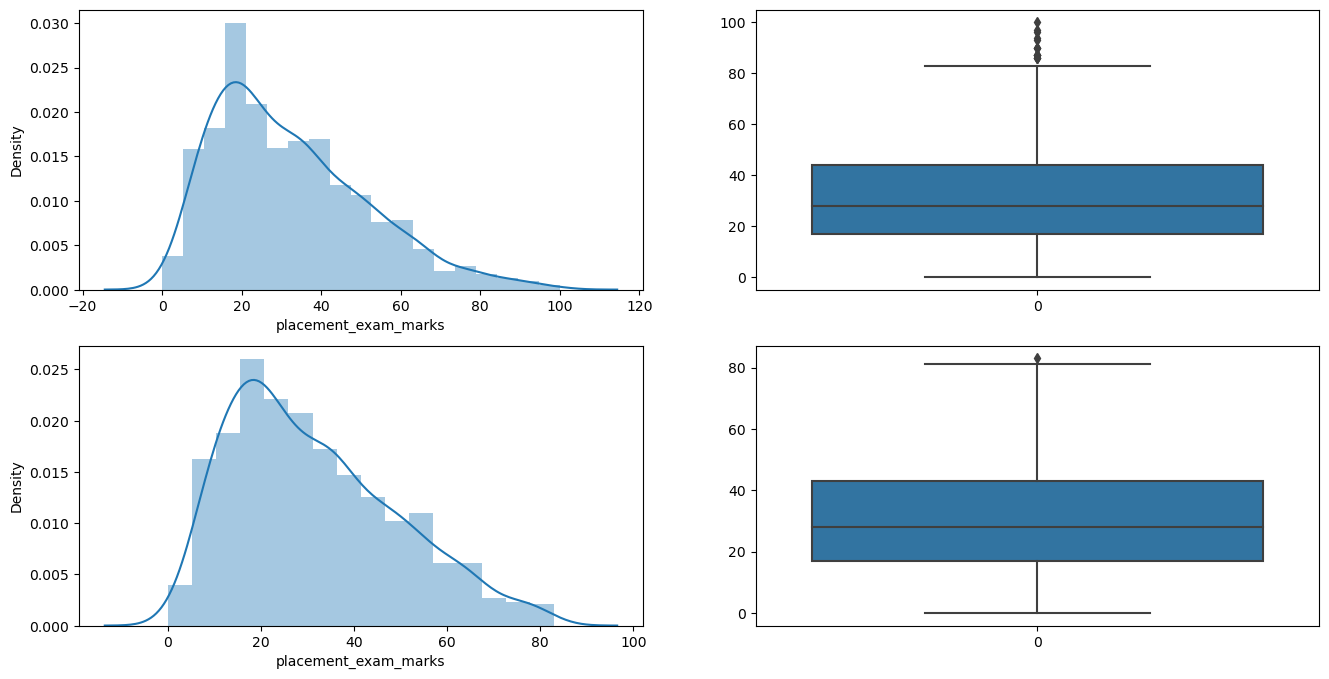

In [29]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()